## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -1.263472 -1.309679  1.429854  1.263478  1.490605  0.678383
1  1.844160 -0.567911  0.149804  1.274555  0.191126  1.442210
2  1.103430  1.476701 -1.480567 -0.139367 -1.636287  0.074819
3 -0.141470 -0.322244 -0.695599  1.337785 -1.574313  0.279980
4  0.655989  0.302777  0.267124  1.604834  0.499400  1.870347


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0211105	total: 57.3ms	remaining: 57.3s
1:	learn: 1.0120715	total: 58.1ms	remaining: 29s
2:	learn: 1.0012499	total: 58.6ms	remaining: 19.5s
3:	learn: 0.9912316	total: 59.2ms	remaining: 14.7s
4:	learn: 0.9812816	total: 60.1ms	remaining: 12s
5:	learn: 0.9707199	total: 60.5ms	remaining: 10s
6:	learn: 0.9589330	total: 61.1ms	remaining: 8.66s
7:	learn: 0.9494263	total: 61.4ms	remaining: 7.61s
8:	learn: 0.9393960	total: 61.8ms	remaining: 6.8s
9:	learn: 0.9301713	total: 62.5ms	remaining: 6.19s
10:	learn: 0.9208905	total: 63.1ms	remaining: 5.67s
11:	learn: 0.9095804	total: 63.7ms	remaining: 5.24s
12:	learn: 0.8999517	total: 64.1ms	remaining: 4.86s
13:	learn: 0.8914600	total: 64.5ms	remaining: 4.54s
14:	learn: 0.8843661	total: 64.8ms	remaining: 4.26s
15:	learn: 0.8752824	total: 65.2ms	remaining: 4.01s
16:	learn: 0.8668076	total: 65.6ms	remaining: 3.79s
17:	learn: 0.8595481	total: 66ms	remaining: 3.6s
18:	learn: 0.8524767	total: 66.4ms	remaining: 3.43s
19

97:	learn: 0.4280624	total: 107ms	remaining: 986ms
98:	learn: 0.4251344	total: 108ms	remaining: 979ms
99:	learn: 0.4213299	total: 108ms	remaining: 973ms
100:	learn: 0.4188127	total: 109ms	remaining: 966ms
101:	learn: 0.4154891	total: 109ms	remaining: 960ms
102:	learn: 0.4125086	total: 109ms	remaining: 953ms
103:	learn: 0.4089717	total: 110ms	remaining: 947ms
104:	learn: 0.4054875	total: 110ms	remaining: 941ms
105:	learn: 0.4018524	total: 111ms	remaining: 935ms
106:	learn: 0.3985269	total: 111ms	remaining: 930ms
107:	learn: 0.3953648	total: 112ms	remaining: 926ms
108:	learn: 0.3930509	total: 113ms	remaining: 921ms
109:	learn: 0.3900791	total: 113ms	remaining: 915ms
110:	learn: 0.3868189	total: 114ms	remaining: 910ms
111:	learn: 0.3840748	total: 114ms	remaining: 904ms
112:	learn: 0.3811808	total: 114ms	remaining: 898ms
113:	learn: 0.3787910	total: 115ms	remaining: 894ms
114:	learn: 0.3757694	total: 115ms	remaining: 888ms
115:	learn: 0.3724815	total: 116ms	remaining: 882ms
116:	learn: 0.3

255:	learn: 0.1490011	total: 188ms	remaining: 546ms
256:	learn: 0.1481601	total: 188ms	remaining: 545ms
257:	learn: 0.1475270	total: 189ms	remaining: 543ms
258:	learn: 0.1466135	total: 189ms	remaining: 541ms
259:	learn: 0.1458408	total: 190ms	remaining: 540ms
260:	learn: 0.1451566	total: 190ms	remaining: 539ms
261:	learn: 0.1441522	total: 191ms	remaining: 537ms
262:	learn: 0.1435254	total: 191ms	remaining: 536ms
263:	learn: 0.1424870	total: 192ms	remaining: 534ms
264:	learn: 0.1413638	total: 192ms	remaining: 532ms
265:	learn: 0.1404912	total: 192ms	remaining: 531ms
266:	learn: 0.1395120	total: 193ms	remaining: 529ms
267:	learn: 0.1388911	total: 193ms	remaining: 528ms
268:	learn: 0.1379863	total: 194ms	remaining: 526ms
269:	learn: 0.1373475	total: 194ms	remaining: 525ms
270:	learn: 0.1364306	total: 194ms	remaining: 523ms
271:	learn: 0.1354497	total: 195ms	remaining: 521ms
272:	learn: 0.1348351	total: 195ms	remaining: 520ms
273:	learn: 0.1341837	total: 196ms	remaining: 519ms
274:	learn: 

470:	learn: 0.0482590	total: 291ms	remaining: 327ms
471:	learn: 0.0479294	total: 292ms	remaining: 327ms
472:	learn: 0.0476446	total: 292ms	remaining: 326ms
473:	learn: 0.0473775	total: 293ms	remaining: 325ms
474:	learn: 0.0470601	total: 293ms	remaining: 324ms
475:	learn: 0.0467737	total: 293ms	remaining: 323ms
476:	learn: 0.0465964	total: 294ms	remaining: 322ms
477:	learn: 0.0463227	total: 294ms	remaining: 322ms
478:	learn: 0.0460452	total: 295ms	remaining: 321ms
479:	learn: 0.0458029	total: 295ms	remaining: 320ms
480:	learn: 0.0455338	total: 296ms	remaining: 319ms
481:	learn: 0.0452753	total: 296ms	remaining: 318ms
482:	learn: 0.0450226	total: 297ms	remaining: 317ms
483:	learn: 0.0448216	total: 297ms	remaining: 317ms
484:	learn: 0.0445694	total: 298ms	remaining: 316ms
485:	learn: 0.0444050	total: 298ms	remaining: 315ms
486:	learn: 0.0441607	total: 299ms	remaining: 315ms
487:	learn: 0.0439680	total: 300ms	remaining: 315ms
488:	learn: 0.0437487	total: 300ms	remaining: 314ms
489:	learn: 

641:	learn: 0.0222628	total: 372ms	remaining: 208ms
642:	learn: 0.0221861	total: 373ms	remaining: 207ms
643:	learn: 0.0220693	total: 373ms	remaining: 206ms
644:	learn: 0.0220285	total: 373ms	remaining: 206ms
645:	learn: 0.0219321	total: 374ms	remaining: 205ms
646:	learn: 0.0218575	total: 374ms	remaining: 204ms
647:	learn: 0.0217585	total: 375ms	remaining: 204ms
648:	learn: 0.0216854	total: 375ms	remaining: 203ms
649:	learn: 0.0215938	total: 376ms	remaining: 202ms
650:	learn: 0.0215005	total: 376ms	remaining: 202ms
651:	learn: 0.0214109	total: 377ms	remaining: 201ms
652:	learn: 0.0212903	total: 377ms	remaining: 200ms
653:	learn: 0.0212354	total: 378ms	remaining: 200ms
654:	learn: 0.0211453	total: 378ms	remaining: 199ms
655:	learn: 0.0210747	total: 379ms	remaining: 199ms
656:	learn: 0.0210053	total: 379ms	remaining: 198ms
657:	learn: 0.0209137	total: 380ms	remaining: 197ms
658:	learn: 0.0208427	total: 380ms	remaining: 197ms
659:	learn: 0.0208057	total: 380ms	remaining: 196ms
660:	learn: 

853:	learn: 0.0098174	total: 474ms	remaining: 81.1ms
854:	learn: 0.0097855	total: 475ms	remaining: 80.5ms
855:	learn: 0.0097496	total: 475ms	remaining: 80ms
856:	learn: 0.0097189	total: 476ms	remaining: 79.4ms
857:	learn: 0.0096949	total: 476ms	remaining: 78.8ms
858:	learn: 0.0096545	total: 477ms	remaining: 78.3ms
859:	learn: 0.0096295	total: 477ms	remaining: 77.7ms
860:	learn: 0.0095905	total: 478ms	remaining: 77.2ms
861:	learn: 0.0095427	total: 479ms	remaining: 76.6ms
862:	learn: 0.0095137	total: 479ms	remaining: 76ms
863:	learn: 0.0094896	total: 480ms	remaining: 75.5ms
864:	learn: 0.0094666	total: 480ms	remaining: 74.9ms
865:	learn: 0.0094281	total: 481ms	remaining: 74.4ms
866:	learn: 0.0093905	total: 481ms	remaining: 73.8ms
867:	learn: 0.0093673	total: 482ms	remaining: 73.2ms
868:	learn: 0.0093297	total: 482ms	remaining: 72.7ms
869:	learn: 0.0092841	total: 483ms	remaining: 72.1ms
870:	learn: 0.0092506	total: 483ms	remaining: 71.5ms
871:	learn: 0.0092077	total: 484ms	remaining: 71ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

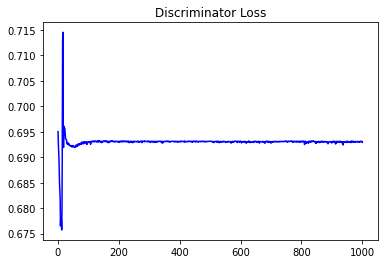

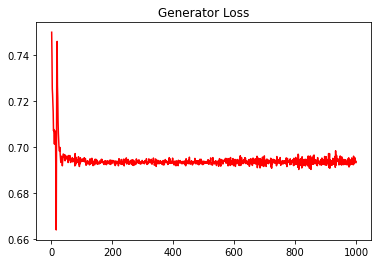

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.10807505835044048


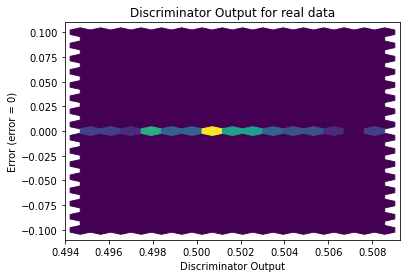

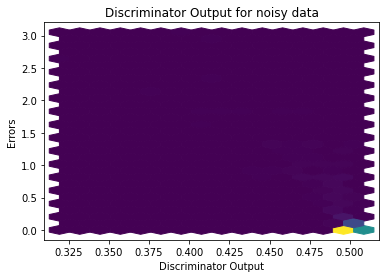

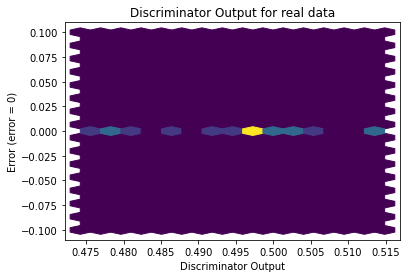

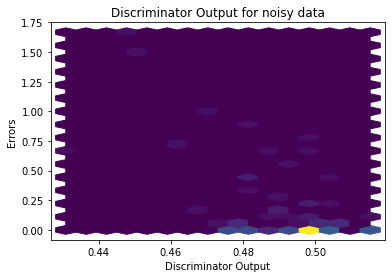

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


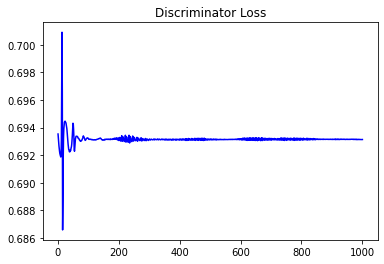

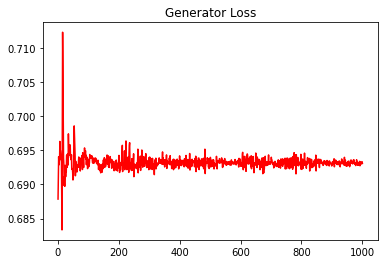

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.13679107291263548


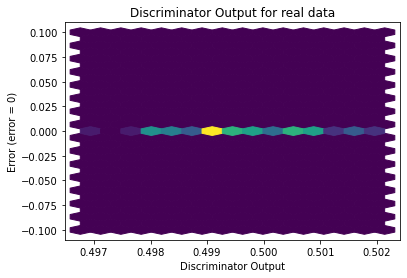

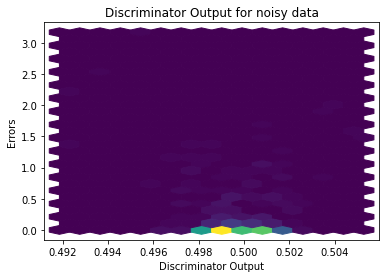

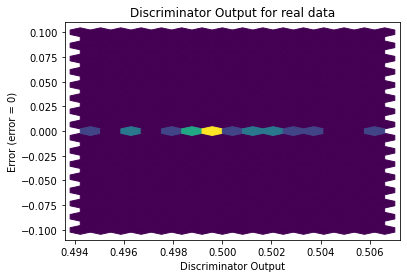

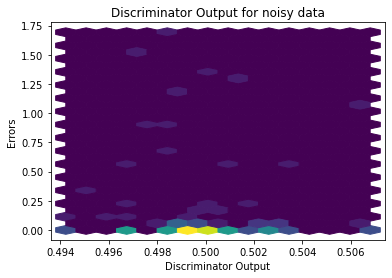

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0352]], requires_grad=True)
